In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "netflix_titles.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivamb/netflix-shows",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/jq/3spgz0t105z044g721j_zwdw0000gn/T/ipykernel_32248/2460556233.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [2]:
# Step 1: Data Preprocessing
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

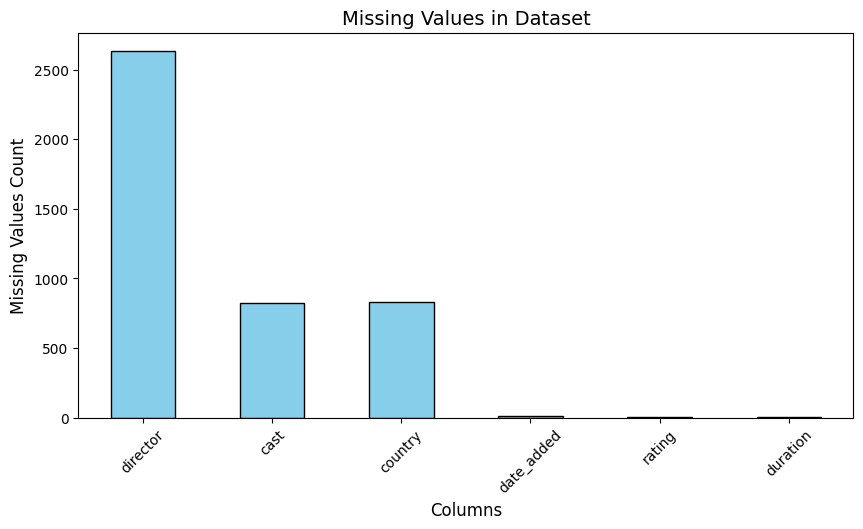

In [5]:


missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot
plt.figure(figsize=(10, 5))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Missing Values Count", fontsize=12)
plt.title("Missing Values in Dataset", fontsize=14)
plt.xticks(rotation=45)

# Show plot
plt.show()

In [6]:
df.fillna('Unknown', inplace = True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
# Step 2: Filtering Data

df[df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


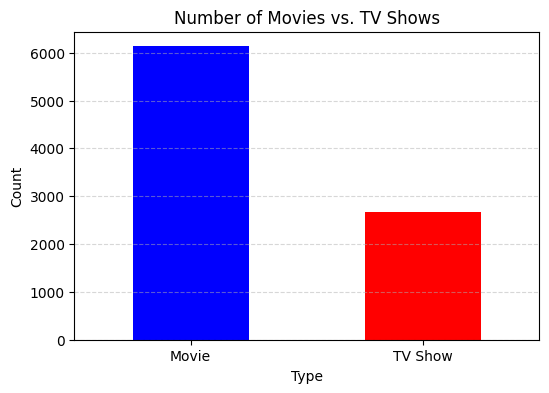

In [9]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Number of Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

In [10]:
df[(df['release_year'] > 2015) & (df['type'] == 'TV Show')]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8783,s8784,TV Show,Yoko,Unknown,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Unknown,2018-06-23,2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,Unknown,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",Unknown,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...


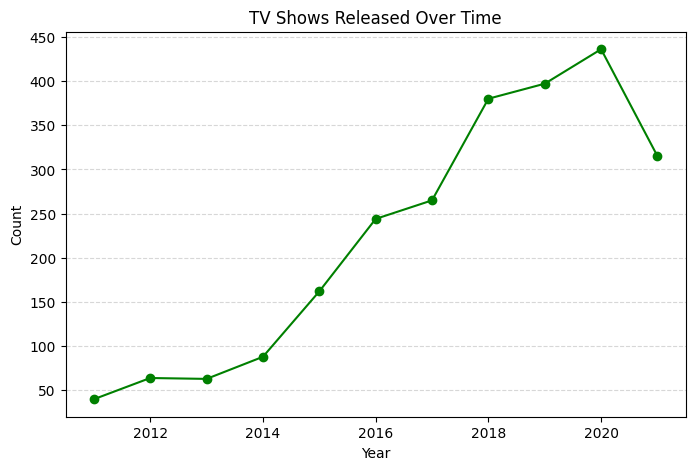

In [11]:
tv_shows = df[df['type'] == 'TV Show']
tv_by_year = tv_shows[tv_shows['release_year'] > 2010]['release_year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(tv_by_year.index, tv_by_year.values, marker='o', linestyle='-', color='green')
plt.title("TV Shows Released Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [12]:
df[df['director'] == 'David Fincher']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
600,s601,Movie,The Game,David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",United States,2021-07-01,1997,R,129 min,Thrillers,An aloof investment banker's life spirals into...
1595,s1596,Movie,MANK,David Fincher,"Gary Oldman, Amanda Seyfried, Charles Dance, L...",United States,2020-12-04,2020,R,133 min,"Dramas, Independent Movies",1930s Hollywood is reevaluated through the eye...
7701,s7702,Movie,Panic Room,David Fincher,"Jodie Foster, Forest Whitaker, Dwight Yoakam, ...",United States,2019-08-01,2002,R,112 min,Thrillers,A woman and her daughter are caught in a game ...
8320,s8321,Movie,The Girl with the Dragon Tattoo,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","United States, Sweden, Norway",2021-01-05,2011,R,158 min,"Dramas, Thrillers",When a young computer hacker is tasked with in...
8511,s8512,Movie,The Social Network,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",United States,2020-04-01,2010,PG-13,121 min,Dramas,Director David Fincher's biographical drama ch...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


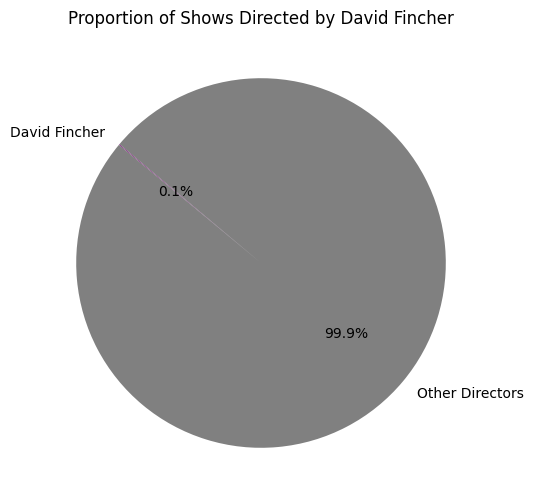

In [13]:
fincher_shows = df[df['director'] == 'David Fincher']
if not fincher_shows.empty:
    labels = ["David Fincher", "Other Directors"]
    sizes = [len(fincher_shows), len(df) - len(fincher_shows)]
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['purple', 'gray'], startangle=140)
    plt.title("Proportion of Shows Directed by David Fincher")
    plt.show()

In [14]:
df[df['listed_in'].str.contains(pat = 'Dramas')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


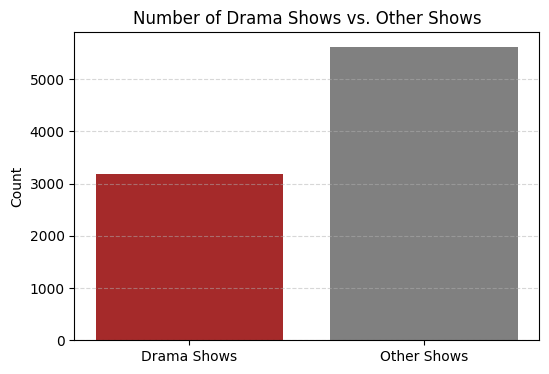

In [15]:
df['listed_in'] = df['listed_in'].astype(str)
drama_shows = df[df['listed_in'].str.contains('Drama', case=False)]
plt.figure(figsize=(6, 4))
plt.bar(["Drama Shows", "Other Shows"], [len(drama_shows), len(df) - len(drama_shows)], color=['brown', 'gray'])
plt.title("Number of Drama Shows vs. Other Shows")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


In [16]:
df[df['date_added'] >= '2020-01-01']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,2020-01-01,1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch..."
8743,s8744,Movie,Wildlife,Paul Dano,"Carey Mulligan, Ed Oxenbould, Bill Camp, Jake ...",United States,2020-09-01,2018,PG-13,105 min,"Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany",2020-01-01,1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...


In [45]:
shows_after_2020 = df[df['date_added'] >= '2020-01-01']
print("\nNumber of Shows Added After 01/01/2020:\n", shows_after_2020[['title', 'date_added']])


Number of Shows Added After 01/01/2020:
                                     title date_added
0                    Dick Johnson Is Dead 2021-09-25
1                           Blood & Water 2021-09-24
2                               Ganglands 2021-09-24
3                   Jailbirds New Orleans 2021-09-24
4                            Kota Factory 2021-09-24
...                                   ...        ...
8742                       Wild Wild West 2020-01-01
8743                             Wildlife 2020-09-01
8745  Willy Wonka & the Chocolate Factory 2020-01-01
8764                           Wyatt Earp 2020-01-01
8805                                 Zoom 2020-01-11

[3376 rows x 2 columns]


In [18]:
# Step 3: Sorting Data
release_counts = df.sort_values(by = 'release_year', ascending = False)
release_counts

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",Unknown,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,Unknown,Unknown,2021-06-02,2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,Unknown,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,2021-06-04,2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,2021-06-04,2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,Unknown,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,Unknown,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [19]:
release_counts = df['release_year'].value_counts().reset_index()
release_counts.columns = ['release_year', 'count']
release_counts = release_counts.sort_values(by='release_year', ascending=False)
print("\nNumber of Shows by Release Year:\n", release_counts.head(10))



Number of Shows by Release Year:
    release_year  count
5          2021    592
3          2020    953
2          2019   1030
0          2018   1147
1          2017   1032
4          2016    902
6          2015    560
7          2014    352
8          2013    288
9          2012    237


In [20]:
df.sort_values(by = 'date_added', ascending = False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,Unknown,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
8557,s8558,TV Show,The West Wing,Unknown,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
8684,s8685,TV Show,Vroomiz,Unknown,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
8712,s8713,TV Show,Weird Wonders of the World,Unknown,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


In [21]:
df_sorted_date = df[['title', 'date_added']].dropna().sort_values(by='date_added', ascending=False)
print("\nShows Sorted by Date Added:\n", df_sorted_date)


Shows Sorted by Date Added:
                                     title date_added
0                    Dick Johnson Is Dead 2021-09-25
6        My Little Pony: A New Generation 2021-09-24
10    Vendetta: Truth, Lies and The Mafia 2021-09-24
9                            The Starling 2021-09-24
8           The Great British Baking Show 2021-09-24
...                                   ...        ...
7370          Mad Ron's Prevues from Hell 2010-11-01
5955                             Splatter 2009-11-18
5956              Just Another Love Story 2009-05-05
6611                      Dinner for Five 2008-02-04
5957                 To and From New York 2008-01-01

[8709 rows x 2 columns]


In [22]:
df.sort_values(by = 'title')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2036,s2037,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
2304,s2305,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,2019,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol..."
2481,s2482,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2020-05-21,2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ..."
2324,s2325,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020-06-28,2020,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
...,...,...,...,...,...,...,...,...,...,...,...,...
6177,s6178,TV Show,忍者ハットリくん,Unknown,Unknown,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
4914,s4915,TV Show,海的儿子,Unknown,"Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",Unknown,2018-04-27,2016,TV-14,1 Season,"International TV Shows, TV Dramas","Two brothers start a new life in Singapore, wh..."
7101,s7102,TV Show,마녀사냥,Unknown,"Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...",South Korea,2018-02-19,2015,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Stand...",Four Korean celebrity men and guest stars of b...
5022,s5023,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,2018-02-28,2017,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...


In [23]:
movies = df[df['type'] == 'Movie'][['title']].sort_values(by='title')
print("\nMovies Sorted Alphabetically:\n", movies.head(10))


Movies Sorted Alphabetically:
                               title
2036                         #Alive
2304  #AnneFrank - Parallel Stories
2481              #FriendButMarried
2324            #FriendButMarried 2
5973                          #Roxy
5695                      #Rucker50
654                         #Selfie
655                      #Selfie 69
5972               #cats_the_mewvie
5277                   #realityhigh


In [24]:
tv_shows = df[df['type'] == 'TV Show'].copy() 
tv_shows['duration_numeric'] = (
    tv_shows['duration']
    .str.extract('(\d+)')
    .astype(float)
)
tv_shows = tv_shows.dropna(subset=['duration_numeric'])
tv_shows_sorted = tv_shows.sort_values(by='duration_numeric', ascending=False)
tv_shows_sorted

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/var/folders/jq/3spgz0t105z044g721j_zwdw0000gn/T/ipykernel_32248/2571483833.py:4: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,17.0
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",15.0
4798,s4799,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,15.0
1354,s1355,TV Show,Heartland,Unknown,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...,13.0
4220,s4221,TV Show,COMEDIANS of the world,Unknown,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,s3854,TV Show,I Have a Script,Unknown,"Souad Abdullah, Shujoon, Fatima Al Safi",Unknown,2019-05-07,2019,TV-14,1 Season,"International TV Shows, TV Comedies, TV Dramas","After the death of a loved one, a woman decide...",1.0
3852,s3853,TV Show,Abyss,Unknown,"Park Bo-young, Ahn Hyo-seop, Lee Sung-jae, Lee...",South Korea,2019-05-07,2019,TV-14,1 Season,"Crime TV Shows, International TV Shows, Korean...",After meeting an untimely demise in separate i...,1.0
3851,s3852,TV Show,Unchained Fate,Unknown,"Lenna Lim, Jack Tan, Rickman Chia, Rabbit Chen...",Unknown,2019-05-08,2016,TV-14,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...",A young trio aims to protect the world from ev...,1.0
3850,s3851,TV Show,The Missing Menu,Unknown,"Frederick Lee, Jojo Goh, Karena Teo, Jeffrey C...",Unknown,2019-05-08,2016,TV-PG,1 Season,"International TV Shows, TV Dramas",A single mom and skilled chef yearns for her c...,1.0


In [25]:
print("\nTV Shows Sorted by Duration:\n", tv_shows_sorted[['title', 'duration']])


TV Shows Sorted by Duration:
                         title    duration
548            Grey's Anatomy  17 Seasons
2423             Supernatural  15 Seasons
4798                     NCIS  15 Seasons
1354                Heartland  13 Seasons
4220   COMEDIANS of the world  13 Seasons
...                       ...         ...
3853          I Have a Script    1 Season
3852                    Abyss    1 Season
3851           Unchained Fate    1 Season
3850         The Missing Menu    1 Season
3696  Record of Grancrest War    1 Season

[2676 rows x 2 columns]


In [26]:
# Step 4: Finding most frequent data
df['director'].dropna().value_counts().idxmax()

'Unknown'

In [27]:
df['director'].dropna().value_counts().max()

np.int64(2634)

In [28]:
top_directors = df['director'].value_counts()
top_directors_table = pd.DataFrame({'Director Name': top_directors.index, 'Number of Shows': top_directors.values})
print("\nTop 5 Most Frequent Directors:")
print(top_directors_table)



Top 5 Most Frequent Directors:
                       Director Name  Number of Shows
0                            Unknown             2634
1                      Rajiv Chilaka               19
2             Raúl Campos, Jan Suter               18
3                        Suhas Kadav               16
4                       Marcus Raboy               16
...                              ...              ...
4524  Raymie Muzquiz, Stu Livingston                1
4525                    Joe Menendez                1
4526                      Eric Bross                1
4527                  Will Eisenberg                1
4528                     Mozez Singh                1

[4529 rows x 2 columns]


In [47]:
df['country'].value_counts().idxmax()

'United States'

In [30]:
df['country'].value_counts().max()

np.int64(2818)

In [31]:
top_countries = df['country'].value_counts().head(5)
top_countries_table = pd.DataFrame({'Country Name': top_countries.index, 'Number of Shows': top_countries.values})
print("\nTop Country with the Most Netflix Shows:")
print(top_countries_table)


Top Country with the Most Netflix Shows:
     Country Name  Number of Shows
0   United States             2818
1           India              972
2         Unknown              831
3  United Kingdom              419
4           Japan              245


In [32]:
df['rating'].value_counts().idxmax()

'TV-MA'

In [33]:
df['rating'].value_counts().max()

np.int64(3207)

In [34]:
top_ratings = df['rating'].value_counts().head(5)
top_ratings_table = pd.DataFrame({'Rating': top_ratings.index, 'Number of Shows': top_ratings.values})
print("\nMost Frequent Ratings:")
print(top_ratings_table)


Most Frequent Ratings:
  Rating  Number of Shows
0  TV-MA             3207
1  TV-14             2160
2  TV-PG              863
3      R              799
4  PG-13              490


In [35]:
# Step 5: Combining conditions
df[(df['listed_in'].str.contains(pat = 'Comedy')) & (df['type'] == 'Movie') & (df['country'] == 'United States')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,2021-08-01,2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer..."
826,s827,Movie,Bo Burnham: Inside,Bo Burnham,Bo Burnham,United States,2021-05-30,2021,TV-MA,88 min,Stand-Up Comedy,A new comedy special shot and performed by Bo ...
1189,s1190,Movie,Nate Bargatze: The Greatest Average American,Troy Miller,Nate Bargatze,United States,2021-03-18,2021,TV-G,60 min,Stand-Up Comedy,"Nate Bargatze touches on Zoom comedy shows, lo..."
1191,s1192,Movie,The Fluffy Movie,"Manny Rodriguez, Jay Lavender",Gabriel Iglesias,United States,2021-03-18,2014,PG-13,101 min,Stand-Up Comedy,Comedian Gabriel Iglesias takes the stage in S...
1278,s1279,Movie,Brian Regan: On the Rocks,Troy Miller,Brian Regan,United States,2021-02-23,2021,TV-G,58 min,Stand-Up Comedy,Brian Regan tackles the big issues weighing on...
...,...,...,...,...,...,...,...,...,...,...,...,...
7179,s7180,Movie,Kevin Hart: Let Me Explain,"Leslie Small, Tim Story",Kevin Hart,United States,2018-07-13,2013,R,75 min,Stand-Up Comedy,Philadelphia funnyman Kevin Hart takes the sta...
7180,s7181,Movie,Kevin Hart: Seriously Funny,Shannon Hartman,Kevin Hart,United States,2018-10-01,2010,TV-MA,67 min,Stand-Up Comedy,"With his unique hip-hop style delivery, Africa..."
7411,s7412,Movie,Martin Lawrence Live: Runteldat,David Raynr,Martin Lawrence,United States,2019-12-01,2002,R,104 min,Stand-Up Comedy,This provocative film sheds light on actor-com...
7560,s7561,Movie,Natalia Valdebenito: Gritona,Natalia Valdebenito,Natalia Valdebenito,United States,2017-11-10,2017,TV-MA,76 min,Stand-Up Comedy,Chile's Natalia Valdebenito hits Santiago's Te...


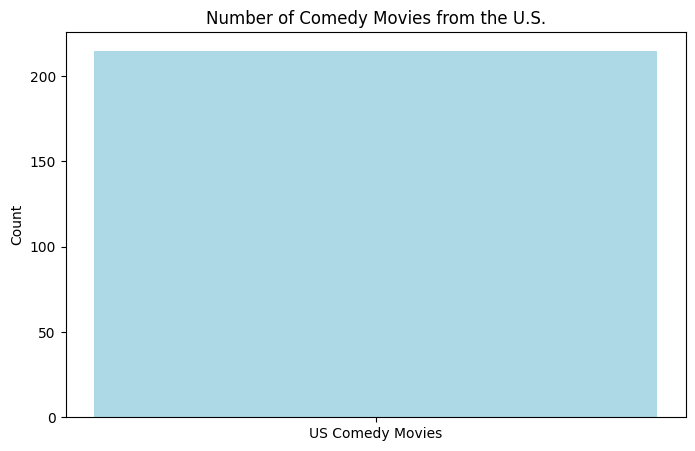

In [36]:
us_comedy = df[(df['listed_in'].str.contains(pat = 'Comedy')) & (df['type'] == 'Movie') & (df['country'] == 'United States')]
plt.figure(figsize=(8,5))
plt.bar(['US Comedy Movies'], [len(us_comedy)], color='lightblue')
plt.title("Number of Comedy Movies from the U.S.")
plt.ylabel("Count")
plt.show()

In [37]:
df[
    (df['listed_in'].str.contains(r'Action|Adventure', case=False, na=False)) &
    (df['type'] == 'TV Show') &
    (df['release_year'] > 2018)
]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",Unknown,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
19,s20,TV Show,Jaguar,Unknown,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",Unknown,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
125,s126,TV Show,Q-Force,Unknown,"Sean Hayes, Wanda Sykes, Laurie Metcalf, David...",United States,2021-09-02,2021,TV-MA,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come...",A gay superspy and his scrappy LGBTQ squad fig...
132,s133,TV Show,Brave Animated Series,Unknown,"Tseng Yun-fan, Kao Yun-shuo, Chiang Ching-yen,...",Unknown,2021-09-01,2021,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...",A group of superheroes sets out to rid the wor...
...,...,...,...,...,...,...,...,...,...,...,...,...
3752,s3753,TV Show,Marvel's Jessica Jones,Unknown,"Krysten Ritter, David Tennant, Rachael Taylor,...",United States,2019-06-14,2019,TV-MA,3 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas","Haunted by a traumatic past, Jessica Jones use..."
3779,s3780,TV Show,Malibu Rescue: The Series,Unknown,"Ricardo Hurtado, Breanna Yde, Jackie R. Jacobs...",United States,2019-06-03,2019,TV-G,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","On the heels of Junior Rescue training, Team F..."
3780,s3781,TV Show,Arthdal Chronicles,Unknown,"Song Joong-ki, Jang Dong-gun, Kim Ji-won, Kim ...",South Korea,2019-06-02,2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Ac...","In a mythical land called Arth, the inhabitant..."
4178,s4179,TV Show,Marvel's The Punisher,Unknown,"Jon Bernthal, Ebon Moss-Bachrach, Ben Barnes, ...",United States,2019-01-18,2019,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Thri...",A former Marine out to punish the criminals re...


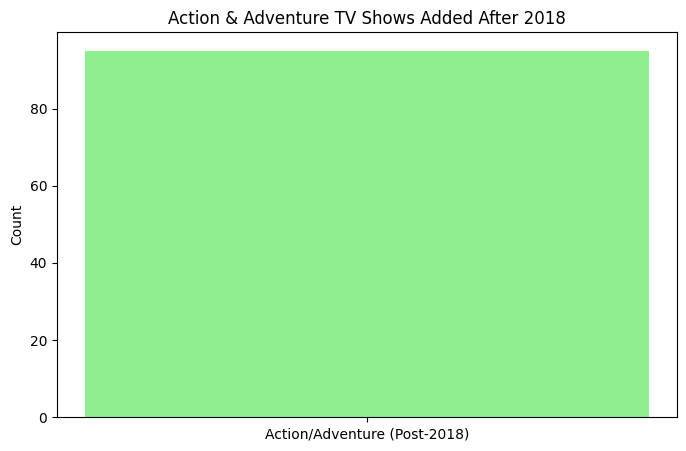

In [38]:
action_adventure = df[
    (df['listed_in'].str.contains(r'Action|Adventure', case=False, na=False)) &
    (df['type'] == 'TV Show') &
    (df['release_year'] > 2018)
]
plt.figure(figsize=(8,5))
plt.bar(['Action/Adventure (Post-2018)'], [len(action_adventure)], color='lightgreen')
plt.title("Action & Adventure TV Shows Added After 2018")
plt.ylabel("Count")
plt.show()

In [39]:
df[(df['director'] == 'Quentin Tarantino') & (df['release_year'] >= 2000)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
392,s393,Movie,Django Unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",United States,2021-07-24,2012,R,165 min,"Action & Adventure, Dramas","Accompanied by a German bounty hunter, a freed..."
3893,s3894,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",Unknown,2019-04-25,2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...
5203,s5204,Movie,The Hateful Eight,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,2017-10-25,2015,R,168 min,"Action & Adventure, Thrillers","Years after the Civil War, a bounty hunter and..."
7077,s7078,Movie,Inglourious Basterds,Quentin Tarantino,"Brad Pitt, Mélanie Laurent, Christoph Waltz, E...","Germany, United States",2019-07-22,2009,R,153 min,Action & Adventure,A Jewish cinema owner in occupied Paris is for...
7197,s7198,Movie,Kill Bill: Vol. 1,Quentin Tarantino,"Uma Thurman, Lucy Liu, Vivica A. Fox, Daryl Ha...","United States, Japan",2020-01-01,2003,R,111 min,Action & Adventure,"An assassin is shot by her ruthless employer, ..."
7198,s7199,Movie,Kill Bill: Vol. 2,Quentin Tarantino,"Uma Thurman, David Carradine, Michael Madsen, ...",United States,2020-01-01,2004,R,137 min,Action & Adventure,The Bride has three left on her rampage list: ...


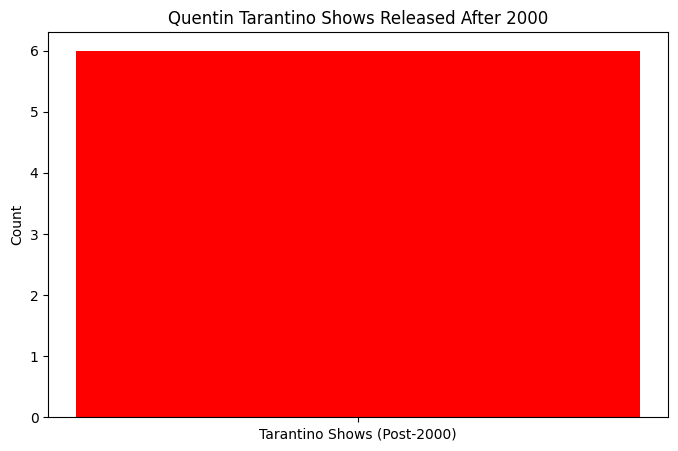

In [40]:
tarantino_shows = df[(df['director'] == 'Quentin Tarantino') & (df['release_year'] >= 2000)]
plt.figure(figsize=(8,5))
plt.bar(['Tarantino Shows (Post-2000)'], [len(tarantino_shows)], color='red')
plt.title("Quentin Tarantino Shows Released After 2000")
plt.ylabel("Count")
plt.show()

In [41]:
df[
    (df['listed_in'].str.contains(r'Crime|Thriller', case=False, na=False))
]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",Unknown,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
14,s15,TV Show,Crime Stories: India Detectives,Unknown,Unknown,Unknown,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
17,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8749,s8750,TV Show,Winter Sun,Unknown,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Turkey,2017-08-01,2014,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Years after ruthless businessmen kill his fath...
8755,s8756,TV Show,Women Behind Bars,Unknown,Unknown,United States,NaT,2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8760,s8761,Movie,Would You Rather,David Guy Levy,"Brittany Snow, Jeffrey Combs, Jonny Coyne, Law...",United States,2019-06-05,2013,TV-MA,93 min,"Horror Movies, Independent Movies, Thrillers","In need of cash to help her sick brother, a yo..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


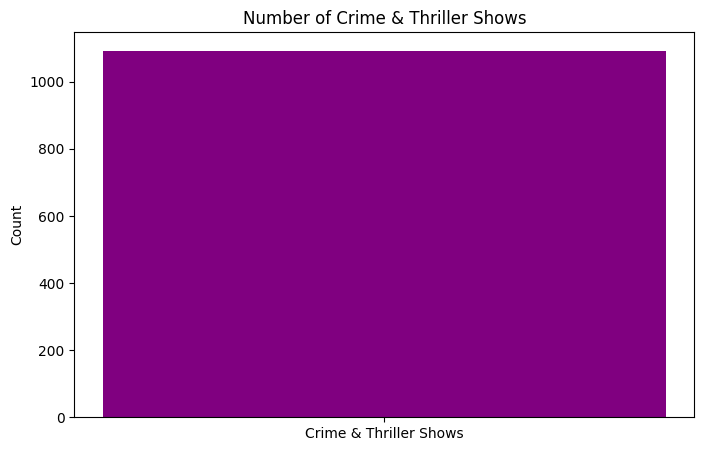

In [42]:
crime_thriller = df[
    (df['listed_in'].str.contains(r'Crime|Thriller', case=False, na=False))
]
plt.figure(figsize=(8,5))
plt.bar(['Crime & Thriller Shows'], [len(crime_thriller)], color='purple')
plt.title("Number of Crime & Thriller Shows")
plt.ylabel("Count")
plt.show()

In [43]:
df[(df['rating'] == 'TV-14') & (df['release_year'] >= 2010) & (df['release_year'] <= 2020)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
21,s22,TV Show,Resurrection: Ertugrul,Unknown,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
56,s57,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,2021-09-15,2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...
60,s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,2021-09-15,2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."
76,s77,TV Show,Yowamushi Pedal,Unknown,"Daiki Yamashita, Kohsuke Toriumi, Jun Fukushim...",Japan,2021-09-14,2013,TV-14,1 Season,"Anime Series, International TV Shows","A timid, anime-loving teen gets drawn into a s..."
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",Unknown,2021-09-11,2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
...,...,...,...,...,...,...,...,...,...,...,...,...
8771,s8772,Movie,Yaara O Dildaara,Ksshitij Chaudhary,"Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulza...",India,2017-11-01,2011,TV-14,132 min,"Dramas, International Movies, Music & Musicals",The patriarch of a wealthy family with one ind...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8774,s8775,Movie,يوم الدين,Abu Bakr Shawky,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...","Egypt, Austria, United States",2019-10-22,2018,TV-14,97 min,"Dramas, Independent Movies, International Movies",A man cured of leprosy and a young orphan leav...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...


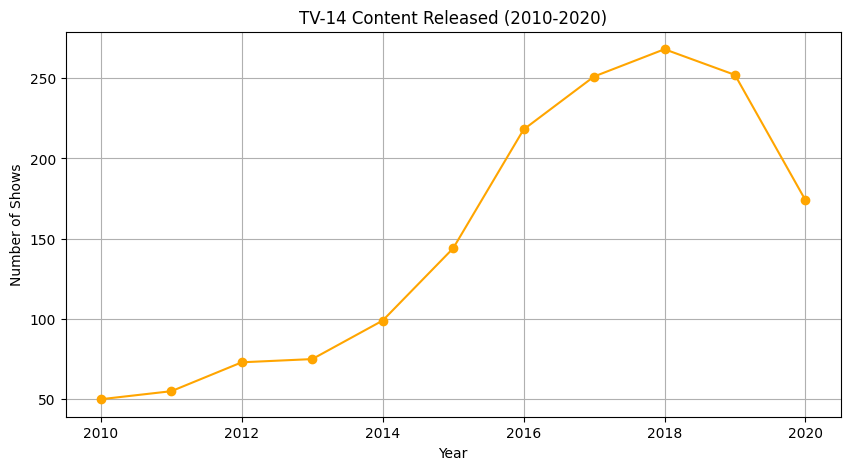

In [44]:
tv14_shows = df[(df['rating'] == 'TV-14') & (df['release_year'].between(2010, 2020))]
tv14_by_year = tv14_shows['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(tv14_by_year.index, tv14_by_year.values, marker='o', linestyle='-', color='orange')
plt.title("TV-14 Content Released (2010-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.show()

In [48]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(5).reset_index()
top_genres.columns = ['Genre', 'Count']
print("Top 5 Most Common Genres:\n", top_genres, "\n")

Top 5 Most Common Genres:
                     Genre  Count
0    International Movies   2752
1                  Dramas   2427
2                Comedies   1674
3  International TV Shows   1351
4           Documentaries    869 

